# <center><u> Decision Tree </u></center>

In decision analysis, a decision tree can be used to visually and explicitly represent decisions and decision making. As the name goes, it uses a tree-like model of decisions.


A Decision tree is a flowchart like tree structure, where each internal node denotes a test on an attribute, each branch represents an outcome of the test, and each leaf node (terminal node) holds a class label.

You can see small example how it work below:


![image.png](attachment:image.png)




### Problem Statement :Income Prediction

In this case study, we will build a decision tree to predict the income of a given population, which is labelled as <=$50K and >$50K. The attributes (predictors) are age, working class type, marital status, gender, race etc.


In the following sections, we'll:
- clean and prepare the data, 
- build a decision tree with default hyperparameters, 
- understand all the hyperparameters that we can tune, and finally
- choose the optimal hyperparameters using grid search cross-validation.
- Pruning

Are you ready for the challenge? Let's get set go!



<hr>

### Understanding and Cleaning the Data

<p style='text-align: right;'> 15 points </p>


In [120]:
# Importing the required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing

%matplotlib inline

In [121]:
# To ignore warnings
import warnings
warnings.filterwarnings("ignore")

In [122]:
# Reading the csv file and putting it into 'df' object.
df = pd.read_csv('adult_dataset.csv')

In [123]:
# Let's understand the type of values in each column of our dataframe 'df'.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education.num   32561 non-null  int64 
 5   marital.status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital.gain    32561 non-null  int64 
 11  capital.loss    32561 non-null  int64 
 12  hours.per.week  32561 non-null  int64 
 13  native.country  32561 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [124]:
# Let's understand the data, how it look like.(Only first 5 rows)
df.head(5)

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,?,77053,HS-grad,9,Widowed,?,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,?,186061,Some-college,10,Widowed,?,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K


You can observe that the columns workclass and occupation consist of missing values which are represented as '?' in the  dataframe.

On looking a bit more closely, you will also find that whenever workclass is having a missing value, occupation is also missing in that row. Let's check how may rows are missing.

In [125]:
# rows with missing values represented as'?'.
df_1 = df[df.workclass == '?']

#print missing rows
df_1

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,?,77053,HS-grad,9,Widowed,?,Not-in-family,White,Female,0,4356,40,United-States,<=50K
2,66,?,186061,Some-college,10,Widowed,?,Unmarried,Black,Female,0,4356,40,United-States,<=50K
14,51,?,172175,Doctorate,16,Never-married,?,Not-in-family,White,Male,0,2824,40,United-States,>50K
24,61,?,135285,HS-grad,9,Married-civ-spouse,?,Husband,White,Male,0,2603,32,United-States,<=50K
44,71,?,100820,HS-grad,9,Married-civ-spouse,?,Husband,White,Male,0,2489,15,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32533,35,?,320084,Bachelors,13,Married-civ-spouse,?,Wife,White,Female,0,0,55,United-States,>50K
32534,30,?,33811,Bachelors,13,Never-married,?,Not-in-family,Asian-Pac-Islander,Female,0,0,99,United-States,<=50K
32541,71,?,287372,Doctorate,16,Married-civ-spouse,?,Husband,White,Male,0,0,10,United-States,>50K
32543,41,?,202822,HS-grad,9,Separated,?,Not-in-family,Black,Female,0,0,32,United-States,<=50K


Now we can check the number of rows in df_1.

In [126]:
# Print df_1 varaible information
df_1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1836 entries, 0 to 32544
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             1836 non-null   int64 
 1   workclass       1836 non-null   object
 2   fnlwgt          1836 non-null   int64 
 3   education       1836 non-null   object
 4   education.num   1836 non-null   int64 
 5   marital.status  1836 non-null   object
 6   occupation      1836 non-null   object
 7   relationship    1836 non-null   object
 8   race            1836 non-null   object
 9   sex             1836 non-null   object
 10  capital.gain    1836 non-null   int64 
 11  capital.loss    1836 non-null   int64 
 12  hours.per.week  1836 non-null   int64 
 13  native.country  1836 non-null   object
 14  income          1836 non-null   object
dtypes: int64(6), object(9)
memory usage: 229.5+ KB


There are 1836 rows with missing values, which is about 5% of the total data. We choose to simply drop these rows, since dropping just 5% data won't make any harm.

In [127]:
# dropping the rows having missing values in workclass
df = df[df['workclass'] != '?']

#Print first 5 rows of dataframe after dropping
df.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K
5,34,Private,216864,HS-grad,9,Divorced,Other-service,Unmarried,White,Female,0,3770,45,United-States,<=50K
6,38,Private,150601,10th,6,Separated,Adm-clerical,Unmarried,White,Male,0,3770,40,United-States,<=50K


Let's see whether any other columns contain a "?". Since "?" is a string, we can apply this check only on the categorical columns.

In [128]:
# select all categorical variables
df_categorical = df.select_dtypes(include = ['object'])

# checking whether any other columns contain a "?"
df_categorical.apply(lambda x : x == '?', axis = 0).sum()

workclass           0
education           0
marital.status      0
occupation          7
relationship        0
race                0
sex                 0
native.country    556
income              0
dtype: int64

Thus, the columns occupation and native.country contain some "?"s. Let's get rid of them.

In [129]:
# dropping the "?"s
df = df[df['occupation'] != '?']
df = df[df['native.country'] != '?']

Now we have a clean dataframe which is ready for model building.<br>

In [130]:
# clean dataframe details
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30162 entries, 1 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             30162 non-null  int64 
 1   workclass       30162 non-null  object
 2   fnlwgt          30162 non-null  int64 
 3   education       30162 non-null  object
 4   education.num   30162 non-null  int64 
 5   marital.status  30162 non-null  object
 6   occupation      30162 non-null  object
 7   relationship    30162 non-null  object
 8   race            30162 non-null  object
 9   sex             30162 non-null  object
 10  capital.gain    30162 non-null  int64 
 11  capital.loss    30162 non-null  int64 
 12  hours.per.week  30162 non-null  int64 
 13  native.country  30162 non-null  object
 14  income          30162 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


## Data Preparation
<p style='text-align: right;'> 15 points </p>


There are a number of preprocessing steps we need to do before building the model. 

Firstly, note that we have both categorical and numeric features as predictors. In previous models such as linear and logistic regression, we had created **dummy variables** for categorical variables, since those models (being mathematical equations) can  process only numeric variables.

All that is not required in decision trees, since they can process categorical variables easily. However, we still need to **encode the categorical variables** into a standard format so that sklearn can understand them and build the tree. We'll do that using the ```LabelEncoder()``` class, which comes with ```sklearn.preprocessing```. 

You can read the documentation of ```LabelEncoder``` <a href="http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.LabelEncoder.html">here</a>.



#### encode categorical variables using Label Encoder


In [131]:
# select all categorical variables
df_categorical = df.select_dtypes(include = ['object'])

#print first 5 rows of categorical columns
df_categorical.head()

,workclass,education,marital.status,occupation,relationship,race,sex,native.country,income
1,Private,HS-grad,Widowed,Exec-managerial,Not-in-family,White,Female,United-States,<=50K
3,Private,7th-8th,Divorced,Machine-op-inspct,Unmarried,White,Female,United-States,<=50K
4,Private,Some-college,Separated,Prof-specialty,Own-child,White,Female,United-States,<=50K
5,Private,HS-grad,Divorced,Other-service,Unmarried,White,Female,United-States,<=50K
6,Private,10th,Separated,Adm-clerical,Unmarried,White,Male,United-States,<=50K


##### apply Label encoder to df_categorical


In [132]:
# Initialise LabelEncoder function
le = preprocessing.LabelEncoder()

#Apply encoding on df_categorical
df_categorical = df_categorical.apply(le.fit_transform)


#print df_categorical first 5 rows
df_categorical.head()

,workclass,education,marital.status,occupation,relationship,race,sex,native.country,income
1,2,11,6,3,1,4,0,38,0
3,2,5,0,6,4,4,0,38,0
4,2,15,5,9,3,4,0,38,0
5,2,11,0,7,4,4,0,38,0
6,2,0,5,0,4,4,1,38,0


#### concat df_categorical with original df


In [133]:
# drop all categorical columns from df 
df = df.drop(df_categorical.columns, axis = 1)

#concat df_categorical to df
df = pd.concat([df,df_categorical], axis = 1)

#Print last 5 rows of df
df.tail()

,age,fnlwgt,education.num,capital.gain,capital.loss,hours.per.week,workclass,education,marital.status,occupation,relationship,race,sex,native.country,income
32556,22,310152,10,0,0,40,2,15,4,10,1,4,1,38,0
32557,27,257302,12,0,0,38,2,7,2,12,5,4,0,38,0
32558,40,154374,9,0,0,40,2,11,2,6,0,4,1,38,1
32559,58,151910,9,0,0,40,2,11,6,0,4,4,0,38,0
32560,22,201490,9,0,0,20,2,11,4,0,3,4,1,38,0


In [134]:
# look at column types in df
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30162 entries, 1 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   age             30162 non-null  int64
 1   fnlwgt          30162 non-null  int64
 2   education.num   30162 non-null  int64
 3   capital.gain    30162 non-null  int64
 4   capital.loss    30162 non-null  int64
 5   hours.per.week  30162 non-null  int64
 6   workclass       30162 non-null  int64
 7   education       30162 non-null  int64
 8   marital.status  30162 non-null  int64
 9   occupation      30162 non-null  int64
 10  relationship    30162 non-null  int64
 11  race            30162 non-null  int64
 12  sex             30162 non-null  int64
 13  native.country  30162 non-null  int64
 14  income          30162 non-null  int64
dtypes: int64(15)
memory usage: 3.7 MB


In [135]:
# convert target variable income to categorical
df['income'] = df['income'].astype('category')

Now all the categorical variables are suitably encoded. Let's build the model.

<hr>

### Model Building and Evaluation

<p style='text-align: right;'> 20 points </p>


Let's first build a decision tree with default hyperparameters. Then we'll use cross-validation to tune them.

In [136]:
# Importing train-test-split 
from sklearn.model_selection import train_test_split

In [137]:
# Putting feature variable to X
X = df.drop('income', axis = 1)

# Putting response variable to y
y = df['income']

In [138]:
# Splitting the data into train and test with test size as 30%, and random state as 99|
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state = 99)

#Print x_train last 5 rows
X_train.tail()

,age,fnlwgt,education.num,capital.gain,capital.loss,hours.per.week,workclass,education,marital.status,occupation,relationship,race,sex,native.country
10712,31,185528,10,0,0,35,2,15,0,11,3,4,0,38
3426,35,145704,9,3942,0,35,2,11,2,9,5,4,0,38
14561,44,326232,4,0,0,48,2,5,0,5,1,4,1,38
25431,18,184693,10,0,0,20,2,15,4,7,3,4,0,25
31627,34,167893,10,0,0,64,2,15,2,9,0,4,1,38


Refer documentation on Descision tree Classifier : https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html

In [139]:
# Importing decision tree classifier from sklearn library
from sklearn.tree import DecisionTreeClassifier

# Initialise decision tree with default hyperparameters, apart from max_depth which is 5 so that we can plot and read the tree.
dt_default = DecisionTreeClassifier(max_depth = 5)

# fitting descision tree on train & test data
dt_default.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=5, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

### Let's check the evaluation metrics of our default model

Reference link: https://scikit-learn.org/stable/modules/generated/sklearn.metrics.classification_report.html

In [140]:
# Importing classification report and confusion matrix from sklearn metrics
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score


# Making predictions
y_pred_default = dt_default.predict(X_test)

# Printing classification report
print(classification_report(y_test, y_pred_default))

              precision    recall  f1-score   support

           0       0.86      0.95      0.91      6867
           1       0.78      0.52      0.63      2182

    accuracy                           0.85      9049
   macro avg       0.82      0.74      0.77      9049
weighted avg       0.84      0.85      0.84      9049



Reference doc on confusion matrix

https://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html#sklearn.metrics.confusion_matrix

In [141]:
# Printing confusion matrix 
print(confusion_matrix(y_test, y_pred_default))
# Printing accuracy
print(accuracy_score(y_test, y_pred_default))

[[6553  314]
 [1039 1143]]
0.8504807161012267


#### Plotting Confusion matrix using plot_confusion_matrix function: 
Reference: https://scikit-learn.org/stable/modules/generated/sklearn.metrics.plot_confusion_matrix.html

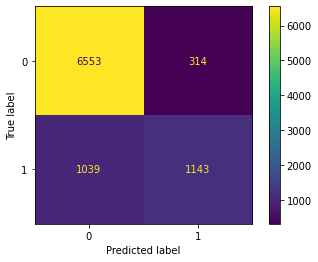

In [142]:
# import plot_confusion_matrix
from sklearn.metrics import plot_confusion_matrix

#plot confusion matrix
plot_confusion_matrix(dt_default, X_test, y_test, values_format = '.5g')
plt.show()

From above plot you can guess how our default model performed. To check your progress we would like to know what is type 1 and type 2 error in the above case? Comment below:

314 FP(False - positive is Type 1 error), 1039 FN-Type 2 **error**

> Indented block



### Plotting the Decision Tree

<p style='text-align: right;'> 10 points </p>


To visualise decision trees in python, you need to install certain external libraries. You can read about the process in detail here: http://scikit-learn.org/stable/modules/tree.html

We need the ```tree``` library to plot a tree.

Reference :https://www.youtube.com/watch?v=ot75kOmpYjI

In [143]:
# Importing required packages for visualization

from sklearn import tree
# Putting all feature names in a list
features = list(df.columns[1:])

#Putting all classes in list i.e >=50 and <=50
cls=['>=50', '<=50']


In [144]:
#Printing features names
print(features)
print("-----------------------------")
#Printing classes names
print(cls)

['fnlwgt', 'education.num', 'capital.gain', 'capital.loss', 'hours.per.week', 'workclass', 'education', 'marital.status', 'occupation', 'relationship', 'race', 'sex', 'native.country', 'income']
-----------------------------
['>=50', '<=50']


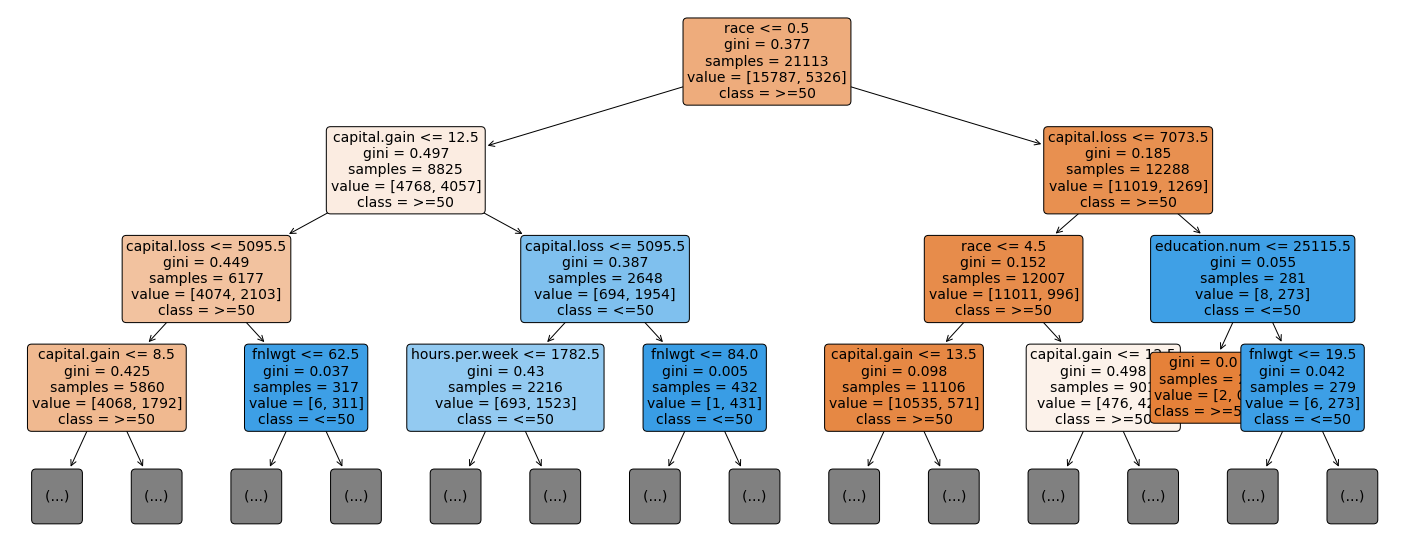

In [145]:
#Plotting our decision tree for max_depth=3
plt.figure(figsize=(25,10))
plt.tight_layout()
tree.plot_tree(dt_default, max_depth=3, feature_names=features, class_names=cls, filled=True, rounded=True, fontsize=14)
plt.show()

In [146]:
# Print textual representation of a tree 
text_representation = tree.export_text(dt_default)

#Print text_representation
print(text_representation)

|--- feature_10 <= 0.50
|   |--- feature_2 <= 12.50
|   |   |--- feature_3 <= 5095.50
|   |   |   |--- feature_2 <= 8.50
|   |   |   |   |--- feature_0 <= 37.50
|   |   |   |   |   |--- class: 0
|   |   |   |   |--- feature_0 >  37.50
|   |   |   |   |   |--- class: 0
|   |   |   |--- feature_2 >  8.50
|   |   |   |   |--- feature_4 <= 1846.00
|   |   |   |   |   |--- class: 0
|   |   |   |   |--- feature_4 >  1846.00
|   |   |   |   |   |--- class: 1
|   |   |--- feature_3 >  5095.50
|   |   |   |--- feature_0 <= 62.50
|   |   |   |   |--- class: 1
|   |   |   |--- feature_0 >  62.50
|   |   |   |   |--- feature_9 <= 6.50
|   |   |   |   |   |--- class: 1
|   |   |   |   |--- feature_9 >  6.50
|   |   |   |   |   |--- class: 0
|   |--- feature_2 >  12.50
|   |   |--- feature_3 <= 5095.50
|   |   |   |--- feature_4 <= 1782.50
|   |   |   |   |--- feature_5 <= 31.00
|   |   |   |   |   |--- class: 0
|   |   |   |   |--- feature_5 >  31.00
|   |   |   |   |   |--- class: 1
|   |   |   |-

Wao!. looks great!. were you able to understand the values and numbers given in this tree structure? Nope?... Don't worry we will explain you through this video

https://www.youtube.com/watch?v=7VeUPuFGJHk
    
Now did you understand the mathematics behind Decision tree and how it decides to classify any problem. 

Now again go back above and check your tree structure and how it came to the conclusion. :)

If you are not able to undertand the chart within the notebook, then you can save it also in you local system and check it...zoom it and understand it...

You can save it like this : **fig.savefig("name_of your_tree.png", dpi=120)**


_______________

You must be thinking that well.. this is calssification problem ...its good. But what if you need to solve a Regression problem using descision tree?...think think!

Here is a video on how regression trees are made...undertsand the mathematics behing it https://www.youtube.com/watch?v=g9c66TUylZ4


<hr>

### Hyperparameter Tuning

<p style='text-align: right;'> 20 points </p>


The default tree is quite complex, and we need to simplify it by tuning the hyperparameters. 

First, let's understand the parameters in a decision tree. You can read this in the documentation using ```help(DecisionTreeClassifier)```.


- **criterion** (Gini/IG or entropy): It defines the function to measure the quality of a split. Sklearn supports “gini” criteria for Gini Index & “entropy” for Information Gain. By default, it takes the value “gini”.
- **splitter**: It defines the strategy to choose the split at each node. Supports “best” value to choose the best split & “random” to choose the best random split. By default, it takes “best” value.
- **max_features**: It defines the no. of features to consider when looking for the best split. We can input integer, float, string & None value.
    - If an integer is inputted then it considers that value as max features at each split.
    - If float value is taken then it shows the percentage of features at each split.
    - If “auto” or “sqrt” is taken then max_features=sqrt(n_features).
    - If “log2” is taken then max_features= log2(n_features).
    - If None, then max_features=n_features. By default, it takes “None” value.
- **max_depth**: The max_depth parameter denotes maximum depth of the tree. It can take any integer value or None. If None, then nodes are expanded until all leaves are pure or until all leaves contain less than min_samples_split samples. By default, it takes “None” value.
- **min_samples_split**: This tells above the minimum no. of samples reqd. to split an internal node. If an integer value is taken then consider min_samples_split as the minimum no. If float, then it shows percentage. By default, it takes “2” value.
- **min_samples_leaf**: The minimum number of samples required to be at a leaf node. If an integer value is taken then consider - -min_samples_leaf as the minimum no. If float, then it shows percentage. By default, it takes “1” value.
- **max_leaf_nodes**: It defines the maximum number of possible leaf nodes. If None then it takes an unlimited number of leaf nodes. By default, it takes “None” value.
- **min_impurity_split**: It defines the threshold for early stopping tree growth. A node will split if its impurity is above the threshold otherwise it is a leaf.<br>



If you are bored reading them... you can even watch this video: https://www.youtube.com/watch?v=XABw4Y3GBR4




<hr>

So what are we waiting for? Lets Tune it

### Tuning max_depth

Let's first try to find the optimum values for max_depth and understand how the value of max_depth affects the decision tree.

Here, we are creating a dataframe with max_depth in range 1 to 80 and checking the accuracy score corresponding to each max_depth. 

To reiterate, a grid search scheme consists of:

    - an estimator (classifier such as SVC() or decision tree)
    - a parameter space
    - a method for searching or sampling candidates (optional) 
    - a cross-validation scheme, and
    - a score function (accuracy, roc_auc etc.)
    
#### GridSearchCV to find optimal max_depth



Are you new to GridSearchCV? Don't worry we will help you to undertand how to use it. https://medium.com/analytics-vidhya/decisiontree-classifier-working-on-moons-dataset-using-gridsearchcv-to-find-best-hyperparameters-ede24a06b489

There is another method of hyperparameter tuning called RandomsearchCV

Wanna know difference in working of GridsearchCV and RandomsearchCV? then check out this video https://www.youtube.com/watch?v=KzIQ3G_TEFg

This video is awsome since it also has extra knowledge on pipeline. SO just grab this knowledge

In [147]:
# Import Kfold and GridSearchCV
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV


# specify number of folds for k-fold CV (we are taking 5)
n_folds = 5

# parameters to build the model on ( As of now just max_depth from range 1 to 40)
parameters = {'max_depth' : range(1, 40)}

# instantiate the model (DecisionTreeClassifier) with criteria gini and random_state as 100
dtree = DecisionTreeClassifier(criterion='gini', random_state=100)

# instantiate GridSearchCV with above 3 parameters and scoring will be accuracy, while return_train_score as true
tree = GridSearchCV(dtree, parameters, cv = n_folds, scoring = 'accuracy', return_train_score=True)

#fit the tree on training data
tree.fit(X_train, y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=100,
                                              splitter='best'),
             iid='deprecated', n_jobs=None,
             param_grid={'max_depth': range(1, 40)}, pre_dispatch='2*n_jobs',
 

In [148]:
# scores of GridSearch CV
scores = tree.cv_results_

#Check the scores in a dataframe  (here just printing first 5 rows)
scores = pd.DataFrame(scores)
scores.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.016593,0.005032,0.002957,0.000979,1,{'max_depth': 1},0.747810,0.747810,0.747573,0.747750,0.747750,0.747738,0.000087,39,0.747721,0.747721,0.747780,0.747735,0.747735,0.747738,0.000022
1,0.023332,0.002451,0.002679,0.000545,2,{'max_depth': 2},0.812219,0.818612,0.820507,0.825675,0.822833,0.819969,0.004538,16,0.821906,0.820308,0.819834,0.818542,0.819253,0.819969,0.001134
2,0.026099,0.001466,0.002535,0.000371,3,{'max_depth': 3},0.828558,0.834241,0.834478,0.836570,0.837518,0.834273,0.003115,12,0.835998,0.834577,0.834458,0.833758,0.833758,0.834510,0.000819
3,0.032840,0.002268,0.002407,0.000261,4,{'max_depth': 4},0.832583,0.840871,0.842529,0.842729,0.842255,0.840193,0.003860,9,0.841622,0.839491,0.844997,0.838908,0.845421,0.842088,0.002707
4,0.037874,0.001078,0.002558,0.000222,5,{'max_depth': 5},0.834241,0.844897,0.847265,0.842729,0.847466,0.843319,0.004858,7,0.844287,0.844227,0.849319,0.841572,0.849683,0.845818,0.003165


Now let's visualize how train and test score changes with max_depth.

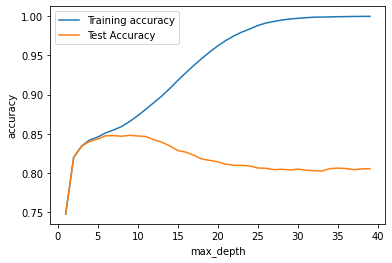

In [149]:
# plotting accuracies with max_depth vs mean train and test scores
plt.figure()
plt.plot(scores['param_max_depth'], scores['mean_train_score'], label = 'Training accuracy')
plt.plot(scores['param_max_depth'], scores['mean_test_score'], label = 'Test Accuracy')
plt.xlabel('max_depth')
plt.ylabel('accuracy')
plt.legend()
plt.show()

You can see that as we increase the value of max_depth, both training and test score increase till about max-depth = 10, after which the test score gradually reduces. Note that the scores are average accuracies across the 5-folds. 

Thus, it is clear that the model is overfitting the training data if the max_depth is too high. Next, let's see how the model behaves with other hyperparameters.

<hr>

### Tuning min_samples_leaf

The hyperparameter **min_samples_leaf** indicates the minimum number of samples required to be at a leaf.<br>

So if the values of min_samples_leaf is less, say 5, then the will be constructed even if a leaf has 5, 6 etc. observations (and is likely to overfit).<br>

Let's see what will be the optimum value for min_samples_leaf.

In [150]:
# GridSearchCV to find optimal max_depth


# specify number of folds for k-fold CV (here 5)
n_folds = 5

# parameters to build the model on( just min_samples_leaf with range 5 to 200 and with step of 20)
parameters = {'min_samples_leaf' : range(5, 200, 20)}

# instantiate the model (DecisionTreeClassifier)
dtree = DecisionTreeClassifier(criterion='gini', random_state=100)

# instantiate GridSearchCV with above 3 parameters and scoring will be accuracy, while return_train_score as true
tree = GridSearchCV(dtree, parameters, cv = n_folds, return_train_score=True, scoring = 'accuracy')

#fitting the above tree on training data
tree.fit(X_train, y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=100,
                                              splitter='best'),
             iid='deprecated', n_jobs=None,
             param_grid={'min_samples_leaf': range(5, 200, 20)},
             p

In [151]:
# scores of GridSearch CV
scores = tree.cv_results_

#Check the scores in a dataframe  (here just printing first 5 rows)
scores = pd.DataFrame(scores)
scores.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_min_samples_leaf,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.089742,0.003764,0.002756,0.000109,5,{'min_samples_leaf': 5},0.825716,0.827848,0.819560,0.826149,0.818806,0.823616,0.003696,10,0.915335,0.911782,0.915335,0.912083,0.913149,0.913537,0.001537
1,0.075952,0.003416,0.002541,0.000048,25,{'min_samples_leaf': 25},0.841819,0.851291,0.839451,0.842018,0.849360,0.844788,0.004651,6,0.868028,0.869686,0.871226,0.867503,0.869872,0.869263,0.001343
2,0.066067,0.001872,0.002584,0.000187,45,{'min_samples_leaf': 45},0.843003,0.849159,0.846555,0.851018,0.851729,0.848293,0.003194,1,0.861042,0.860154,0.862581,0.860399,0.863714,0.861578,0.001362
3,0.061682,0.003210,0.002422,0.000031,65,{'min_samples_leaf': 65},0.841108,0.852711,0.845371,0.851492,0.838465,0.845830,0.005589,2,0.857549,0.855773,0.858555,0.855189,0.858149,0.857043,0.001328
4,0.060618,0.003289,0.002452,0.000057,85,{'min_samples_leaf': 85},0.838030,0.849159,0.845371,0.851492,0.842018,0.845214,0.004834,3,0.853108,0.853108,0.855654,0.854005,0.854597,0.854095,0.000963


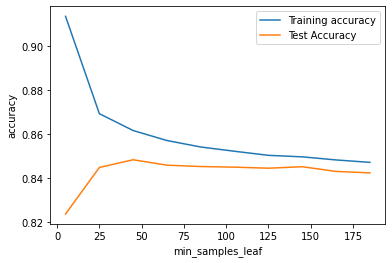

In [152]:
# plotting accuracies with min_samples_leaf vs mean train and test accuracy
plt.figure()
plt.plot(scores['param_min_samples_leaf'], scores['mean_train_score'], label = 'Training accuracy')
plt.plot(scores['param_min_samples_leaf'], scores['mean_test_score'], label = 'Test Accuracy')
plt.xlabel('min_samples_leaf')
plt.ylabel('accuracy')
plt.legend()
plt.show()






You can see that at low values of min_samples_leaf, the tree gets a bit overfitted. At values > 100, however, the model becomes more stable and the training and test accuracy start to converge.

<hr>

### Tuning min_samples_split

The hyperparameter **min_samples_split** is the minimum no. of samples required to split an internal node. Its default value is 2, which means that even if a node is having 2 samples it can be furthur divided into leaf nodes.

In [153]:
# specify number of folds for k-fold CV
n_folds = 5

# parameters to build the model on (here just min_samples_split with range 5 to 200 with step size as 20)
parameters = {'min_samples_split' : range(5, 200, 20)}

# instantiate the model(DecisionTreeClassifier)
dtree = DecisionTreeClassifier(criterion='gini', random_state=100)

# instantiate GridSearchCV with above 3 parameters and scoring will be accuracy, while return_train_score as true
tree = GridSearchCV(dtree, parameters, scoring='accuracy', cv = n_folds, return_train_score=True)

#fitting the above tree on training data
tree.fit(X_train, y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=100,
                                              splitter='best'),
             iid='deprecated', n_jobs=None,
             param_grid={'min_samples_split': range(5, 200, 20)},
             

In [154]:
# scores of GridSearch CV
scores = tree.cv_results_

#Check the scores in a dataframe  (here just printing first 5 rows)
scores = pd.DataFrame(scores)
scores.head()


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_min_samples_split,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.094688,0.005052,0.003117,0.000390,5,{'min_samples_split': 5},0.811982,0.811035,0.818376,0.811701,0.808385,0.812296,0.003296,10,0.969094,0.969331,0.969509,0.970458,0.971227,0.969924,0.000800
1,0.089880,0.002617,0.003033,0.000321,25,{'min_samples_split': 25},0.825006,0.825243,0.830215,0.822596,0.827570,0.826126,0.002581,9,0.906927,0.906513,0.906986,0.906577,0.911847,0.907770,0.002047
2,0.083738,0.003744,0.003136,0.000529,45,{'min_samples_split': 45},0.835188,0.839687,0.830215,0.827333,0.838702,0.834225,0.004783,8,0.890527,0.890053,0.889816,0.888521,0.896335,0.891051,0.002725
3,0.084451,0.002739,0.002594,0.000065,65,{'min_samples_split': 65},0.839451,0.845844,0.837556,0.833728,0.843913,0.840098,0.004360,7,0.883896,0.882238,0.883245,0.880765,0.884258,0.882880,0.001261
4,0.079542,0.000670,0.002825,0.000328,85,{'min_samples_split': 85},0.846081,0.853895,0.838977,0.837281,0.845334,0.844314,0.005898,6,0.877383,0.877442,0.879515,0.875081,0.880706,0.878025,0.001940


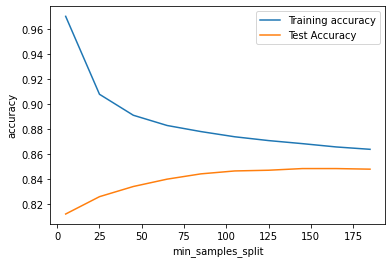

In [155]:
# plotting accuracies with min_samples_split  vs mean train and test accuracy
plt.figure()
plt.plot(scores['param_min_samples_split'], scores['mean_train_score'], label = 'Training accuracy')
plt.plot(scores['param_min_samples_split'], scores['mean_test_score'], label = 'Test Accuracy')
plt.xlabel('min_samples_split')
plt.ylabel('accuracy')
plt.legend()
plt.show()




This shows that as you increase the min_samples_split, the tree overfits lesser since the model is less complex.

<hr>

## Grid Search to Find Optimal Hyperparameters

<p style='text-align: right;'> 10 points </p>


We can now use GridSearchCV to find multiple optimal hyperparameters together. Note that this time, we'll also specify the criterion (gini/entropy or IG).

In [156]:
# Create the parameter grid ( we already defined for you)
param_grid = {
    'max_depth': range(5, 15, 5),
    'min_samples_leaf': range(50, 150, 50),
    'min_samples_split': range(50, 150, 50),
    'criterion': ["entropy", "gini"]
}

# no. of folds(5)
n_folds = 5

# Instantiate the grid search model with default parameters value
dtree = DecisionTreeClassifier(random_state=42)


# instantiate GridSearchCV with above 3 parameters and verbose as 1
grid_search = GridSearchCV(dtree, param_grid, cv = n_folds, verbose=1)

# Fit the grid search to the data
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 16 candidates, totalling 80 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  80 out of  80 | elapsed:    4.5s finished


GridSearchCV(cv=5, error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=42,
                                              splitter='best'),
             iid='deprecated', n_jobs=None,
             param_grid={'criterion': ['entropy', 'gini'],
                     

In [157]:
# cv results
cv_results = grid_search.cv_results_
cv_results = pd.DataFrame(cv_results)
#Printing CV_result
print(cv_results)

    mean_fit_time  std_fit_time  ...  std_test_score  rank_test_score
0        0.046557      0.002066  ...        0.004173               13
1        0.045428      0.001963  ...        0.004173               13
2        0.045295      0.001296  ...        0.004157               15
3        0.047594      0.003173  ...        0.004157               15
4        0.074672      0.003393  ...        0.004456                3
5        0.073553      0.002055  ...        0.004456                3
6        0.069862      0.003489  ...        0.003661                5
7        0.066583      0.000941  ...        0.003661                5
8        0.036648      0.000487  ...        0.004927                9
9        0.037311      0.002074  ...        0.004927                9
10       0.036648      0.001146  ...        0.004234               11
11       0.036528      0.001478  ...        0.004234               11
12       0.059702      0.001997  ...        0.004093                1
13       0.061265   

In [158]:
# printing the optimal accuracy score 
print('best accuracy : ', grid_search.best_score_)
#Printing best hyperparameters parameters & its values
print("Best hyperparameters : ", grid_search.best_params_)


best accuracy :  0.8510400232064759
Best hyperparameters :  {'criterion': 'gini', 'max_depth': 10, 'min_samples_leaf': 50, 'min_samples_split': 50}


<hr>

**Running the model with best parameters obtained from grid search.**

In [159]:
# model with optimal hyperparameters also add random state as 100
clf_gini = DecisionTreeClassifier(criterion='gini', random_state=100, max_depth=10, min_samples_leaf=50, min_samples_split=50)


# fitting above model with training data/
clf_gini.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=10, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=50, min_samples_split=50,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=100, splitter='best')

In [160]:
# accuracy score
print(clf_gini.score(X_test, y_test))

0.850922753895458


[Text(896.9229343220338, 518.8909090909091, 'race <= 0.5\ngini = 0.377\nsamples = 21113\nvalue = [15787, 5326]\nclass = >=50'),
 Text(512.9284957627118, 469.4727272727273, 'capital.gain <= 12.5\ngini = 0.497\nsamples = 8825\nvalue = [4768, 4057]\nclass = >=50'),
 Text(339.44014830508473, 420.05454545454546, 'capital.loss <= 5095.5\ngini = 0.449\nsamples = 6177\nvalue = [4074, 2103]\nclass = >=50'),
 Text(239.69173728813558, 370.6363636363636, 'capital.gain <= 8.5\ngini = 0.425\nsamples = 5860\nvalue = [4068, 1792]\nclass = >=50'),
 Text(68.5677966101695, 321.21818181818185, 'fnlwgt <= 37.5\ngini = 0.193\nsamples = 926\nvalue = [826, 100]\nclass = >=50'),
 Text(28.3728813559322, 271.8, 'workclass <= 49.0\ngini = 0.08\nsamples = 311\nvalue = [298, 13]\nclass = >=50'),
 Text(18.915254237288135, 222.38181818181818, 'income <= 34.5\ngini = 0.061\nsamples = 254\nvalue = [246, 8]\nclass = >=50'),
 Text(9.457627118644067, 172.96363636363634, 'gini = 0.0\nsamples = 72\nvalue = [72, 0]\nclass = 

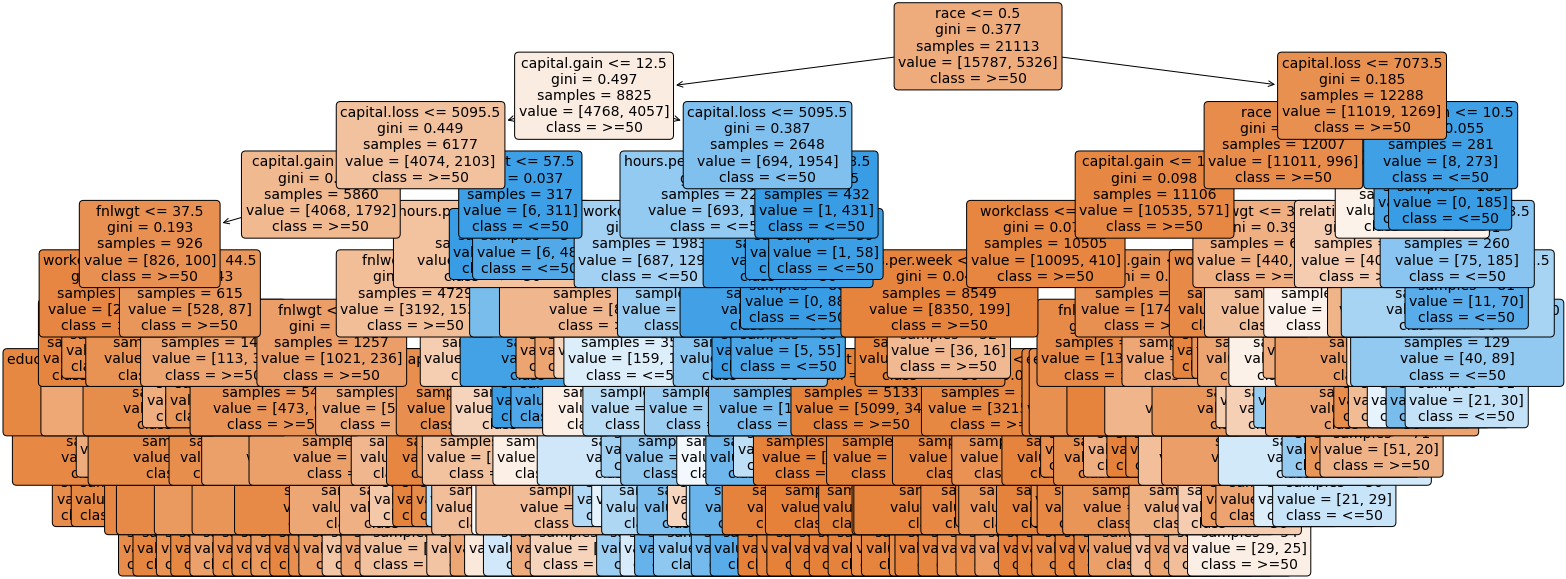

In [161]:
# Importing tree for visualization
from sklearn import tree

# plotting the tree
plt.figure(figsize = (25,10))
plt.tight_layout()
tree.plot_tree(clf_gini, feature_names = features, class_names = cls, rounded = True, filled = True, fontsize = 14)


You can see that this tree is too complex to understand. Let's try reducing just max_depth and see how the tree looks.

In [162]:
# tree with max_depth = 3
clf_gini = DecisionTreeClassifier(criterion='gini', random_state=100, max_depth=3, min_samples_leaf=50, min_samples_split=50)


# fitting the model with training data

clf_gini.fit(X_train, y_train)

# Print model score
clf_gini.score(X_test, y_test)


0.8393192617968837

[Text(697.5, 475.65000000000003, 'race <= 0.5\ngini = 0.377\nsamples = 21113\nvalue = [15787, 5326]\nclass = >=50'),
 Text(348.75, 339.75, 'capital.gain <= 12.5\ngini = 0.497\nsamples = 8825\nvalue = [4768, 4057]\nclass = >=50'),
 Text(174.375, 203.85000000000002, 'capital.loss <= 5095.5\ngini = 0.449\nsamples = 6177\nvalue = [4074, 2103]\nclass = >=50'),
 Text(87.1875, 67.94999999999999, 'gini = 0.425\nsamples = 5860\nvalue = [4068, 1792]\nclass = >=50'),
 Text(261.5625, 67.94999999999999, 'gini = 0.037\nsamples = 317\nvalue = [6, 311]\nclass = <=50'),
 Text(523.125, 203.85000000000002, 'capital.loss <= 5095.5\ngini = 0.387\nsamples = 2648\nvalue = [694, 1954]\nclass = <=50'),
 Text(435.9375, 67.94999999999999, 'gini = 0.43\nsamples = 2216\nvalue = [693, 1523]\nclass = <=50'),
 Text(610.3125, 67.94999999999999, 'gini = 0.005\nsamples = 432\nvalue = [1, 431]\nclass = <=50'),
 Text(1046.25, 339.75, 'capital.loss <= 7073.5\ngini = 0.185\nsamples = 12288\nvalue = [11019, 1269]\nclass = >=

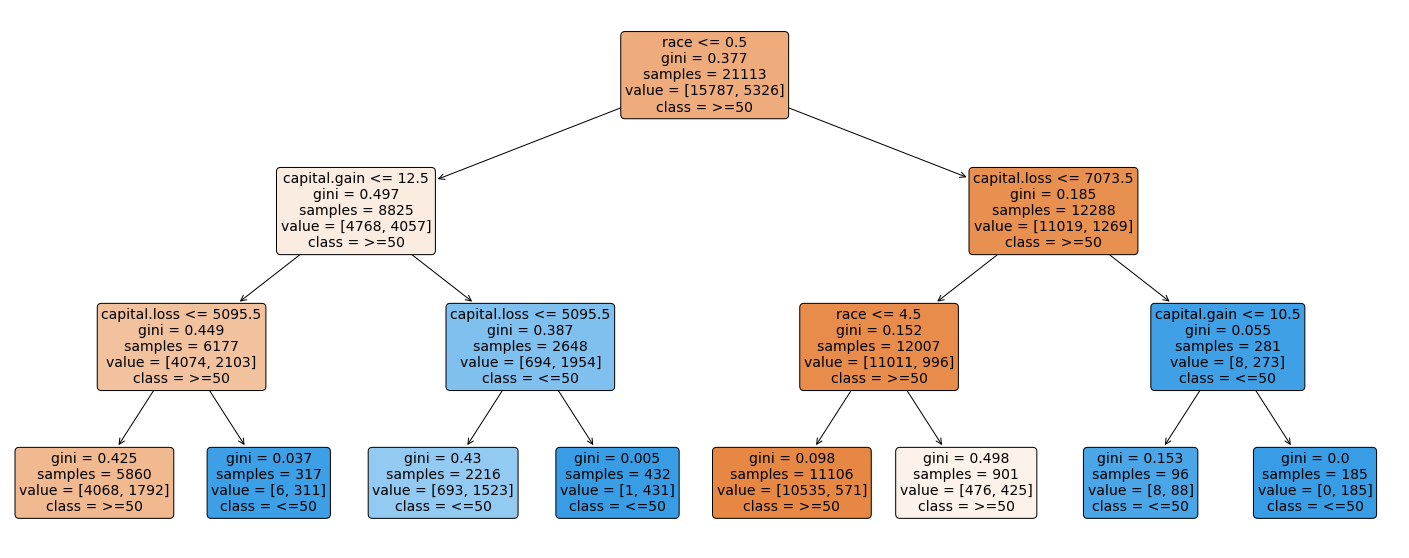

In [163]:
# plotting tree with max_depth=3

plt.figure(figsize = (25,10))
plt.tight_layout()
tree.plot_tree(clf_gini, feature_names = features, class_names = cls, rounded = True, filled = True, fontsize = 14)







So beautifull! Isn't it. The above tree looks bit more clear and understanding. 

Let us now check classification matrix

In [164]:
# Predict on test data
y_pred = clf_gini.predict(X_test)

# print matrix of classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.85      0.96      0.90      6867
           1       0.77      0.47      0.59      2182

    accuracy                           0.84      9049
   macro avg       0.81      0.71      0.74      9049
weighted avg       0.83      0.84      0.82      9049



[[6564  303]
 [1151 1031]]


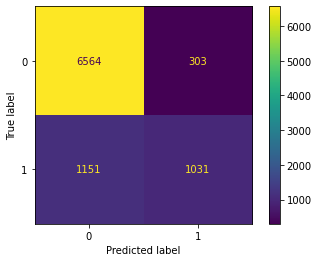

In [165]:
# Print confusion matrix
print(confusion_matrix(y_test, y_pred))
#plot confusion matrix
plot_confusion_matrix(clf_gini, X_test, y_test, values_format = '.5g')
plt.show()

Well Well Well! the above model is not much better than the default model. Still its fine. Not that bad. Atleast now tree is not much complex to understand.

## Pruning in Descision tree

<p style='text-align: right;'> 10 points </p>



PRUNING! Sounds like a new jargan. 

Pruning is one of the techniques that is used to overcome our problem of Overfitting. Pruning, in its literal sense, is a practice which involves the selective removal of certain parts of a tree(or plant), such as branches, buds, or roots, to improve the tree’s structure, and promote healthy growth. This is exactly what Pruning does to our Decision Trees as well. It makes it versatile so that it can adapt if we feed any new kind of data to it, thereby fixing the problem of overfitting.

It reduces the size of a Decision Tree which might slightly increase your training error but drastically decrease your testing error, hence making it more adaptable.

Reference : https://www.youtube.com/watch?v=SLOyyFHbiqo



Pruning sounds interesting! Lets apply prune our model to avoid overfitting.

**Minimal Cost-Complexity** Pruning is one of the types of Pruning of Decision Trees. This algorithm is parameterized by α(≥0) known as the complexity parameter. Not getting? Don't worry we will not let you get confused. Check out this documentation link link
https://scikit-learn.org/stable/auto_examples/tree/plot_cost_complexity_pruning.html


DecisionTree in sklearn has a function called cost_complexity_pruning_path, which gives the effective alphas of subtrees during pruning and also the corresponding impurities. In other words, we can use these values of alpha to prune our decision tree:

So lets apply Pruning on our last build model.


In [166]:
#Initialise cost_complexity_pruning_path with training data
path = clf_gini.cost_complexity_pruning_path(X_train, y_train)

#Checing out ccp_alphas and impurities
ccp_alphas, impurities = path.ccp_alphas, path.impurities

In [167]:
#Printing all alphas
print(ccp_alphas)

[0.00000000e+00 4.15771003e-05 3.29981250e-03 1.29901716e-02
 1.39448764e-02 2.05367356e-02 2.77360949e-02 6.18175275e-02]


We will set these values of alpha and pass it to the ccp_alpha parameter of our DecisionTreeClassifier. By looping over the alphas array, we will find the accuracy on both Train and Test parts of our dataset.

In [168]:
# Initialise empty arrays for train and test accuracy
Accuracy_Train, Accuracy_Test = [], []

#Iterate over ccp_alpha
for ccp_alpha in ccp_alphas:
    
    #Instantiate DecisionTreeClassifier with random_state=0 and ccp_alpha as ccp_alpha iterated value
    clf = DecisionTreeClassifier(ccp_alpha=ccp_alpha, random_state=0)
    
    #Fitting model on training data
    clf.fit(X_train, y_train)
    
    #Predicting on train data
    Train_pred=clf.predict(X_train)
    
    #predicting on test data
    Test_pred= clf.predict(X_test)
    
    #Appending training accuracy 
    Accuracy_Train.append(accuracy_score(y_train, Train_pred))
    
    #Appending test accuracy 
    Accuracy_Test.append(accuracy_score(y_test, Test_pred))


<Figure size 720x360 with 0 Axes>

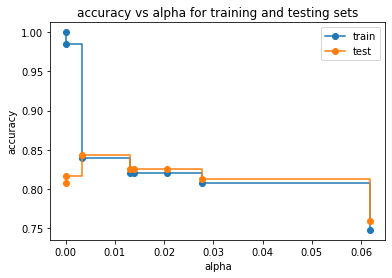

In [169]:
#Plotting all alpha vs Train and test accuracy scores
plt.figure(figsize=(10,5))
fig, ax = plt.subplots()
ax.set_xlabel('alpha')
ax.set_ylabel('accuracy')
ax.set_title('accuracy vs alpha for training and testing sets')
ax.plot(ccp_alphas, Accuracy_Train, marker = 'o', label = 'train', drawstyle = 'steps-post')
ax.plot(ccp_alphas, Accuracy_Test, marker = 'o', label = 'test', drawstyle = 'steps-post')
ax.legend()
plt.show()

From the above plot, we can see that between first and second alpha values, we get the maximum test accuracy. Although our train accuracy has decreased to 0.8, our model is now more generalized and it will perform better on unseen data.


So now we will add ccp_alpha as  as another hyperparameter along with grid searched parameters in our deciscion tree




In [170]:
'''Set '0.01'  as ccp_alpha value in our final deciscion tree'''


# Instantiate DecisionTreeClassifier
final_dt= DecisionTreeClassifier(ccp_alpha=0.01, random_state=100, max_depth=3, min_samples_leaf=50, min_samples_split=50)

#Fitting model on training data
final_dt.fit(X_train, y_train)

#Predicting on train data
Train_pred=final_dt.predict(X_train)

#predicting on test data
Test_pred= final_dt.predict(X_test)

# Print final test and train accuracy
print(accuracy_score(y_train, Train_pred))
print(accuracy_score(y_test, Test_pred))


0.8344148155165064
0.8393192617968837


The Result of our model seems very much trustworthy now!

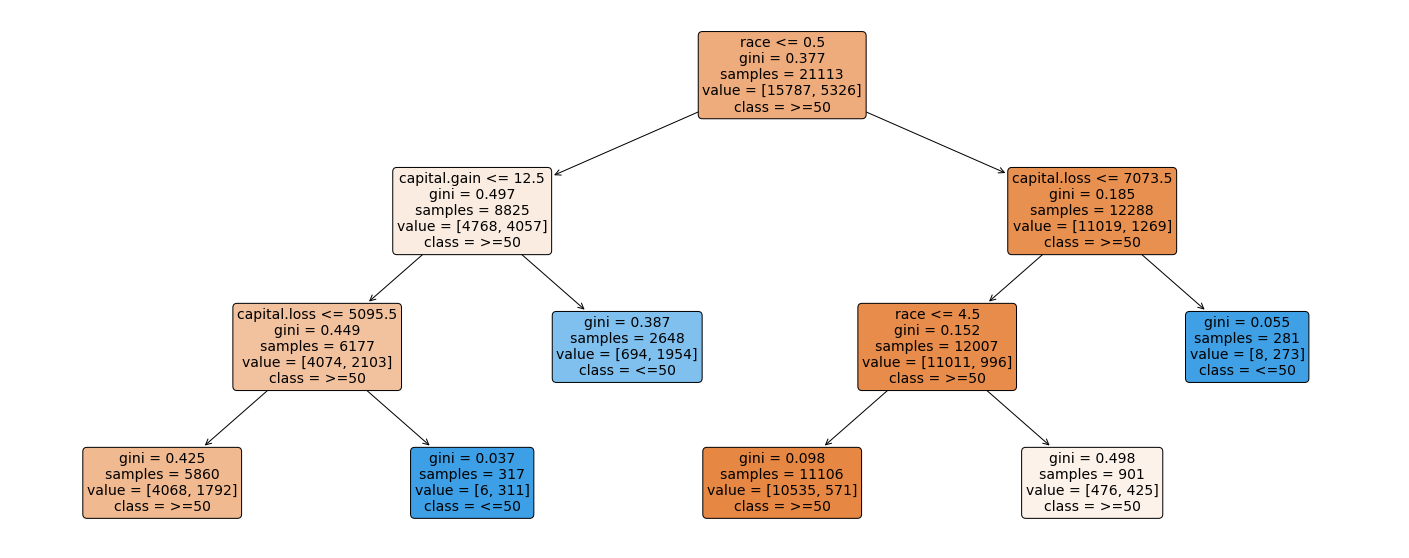

In [171]:
# plotting tree.  

plt.figure(figsize=(25,10))
plt.tight_layout()
tree.plot_tree(final_dt, feature_names=features, filled=True, rounded=True, fontsize=14, class_names=cls)
plt.show()


Good job!

Since you did a great job. We would like to give you a bonus video on interview questions on decision tree

https://www.youtube.com/watch?v=_AnwbV0tPH8 

# Bravo! Congrats you completed 15th milestone challenge of Descision Tree

:)!! 

# Its Feedback Time!

We hope you’ve enjoyed this course so far. We’re committed to help you use "AI for All" course to its full potential, so that you have a great learning experience. And that’s why we need your help in form of a feedback here.

**Please fill this feedback form**
 https://zfrmz.in/MtRG5oWXBdesm6rmSM7N
 
-------------------------------------
 